### Lab 1 Find - S Algorithm

In [1]:
import csv
with open('file1.csv','r') as f:
    reader=csv.reader(f)
    your_list=list(reader)
    h=[['0','0','0','0','0','0']]
    for i in your_list:
        print(i)
        if i[-1]=="TRUE":
            j=0
            for x in i:
                if x!="TRUE":
                    if x!=h[0][j] and h[0][j]=='0':
                        h[0][j]=x
                    elif x!=h[0][j] and h[0][j]!='0':
                        h[0][j]='?'
                else:
                    pass
                j=j+1
print("Most Specific Hyothesis")
print(h)


['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'TRUE']
['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'TRUE']
['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'FALSE']
['sunny', 'warm', 'high', 'strong', 'cold', 'change', 'TRUE']
Most Specific Hyothesis
[['sunny', 'warm', '?', 'strong', '?', '?']]


### Lab 2 Candidate Elimination Algorithm

In [2]:
dataarr=[]
with open('lab2.csv') as f:
    for line in f:
        dataarr.append(line.strip().split(','))
rows=len(dataarr)
cols=len(dataarr[0])
shypo=['0']*(cols-1)
ghypo=[['?']*(cols-1)]
print( "initial specific hypothesis is: ",shypo)
print( "initial general hypothesis is: ",ghypo)

for x in range(1,rows):
    lst=dataarr[x]

    if lst[cols-1]=="1":
        for i in range(0,cols-1):
            if shypo[i]==lst[i]:
                continue
            shypo[i]='?' if shypo[i]!='0' else lst[i]
            for g in ghypo:
                if g[i]!='?' and shypo[i]=='?':
                    ghypo.remove(g)

    elif lst[cols-1]=="0":
        for i in range(0,cols-1):
            if lst[i]!=shypo[i] and shypo[i]!='?':
                temp_list=['?']*i+[shypo[i]]+(['?']*(cols-2-i))
                if temp_list not in ghypo:
                    ghypo.append(temp_list)
print( "S",[x],"=",shypo)
print( "G",[x],"=",ghypo)
print( "S[4]=",shypo)
print( "G[4]=",ghypo)
print( "\nFinal hypothesis is: ",shypo)

initial specific hypothesis is:  ['0', '0', '0', '0', '0', '0']
initial general hypothesis is:  [['?', '?', '?', '?', '?', '?']]
S [3] = ['sunny', 'warm', '?', 'strong', '?', '?']
G [3] = [['?', '?', '?', '?', '?', '?'], ['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]
S[4]= ['sunny', 'warm', '?', 'strong', '?', '?']
G[4]= [['?', '?', '?', '?', '?', '?'], ['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]

Final hypothesis is:  ['sunny', 'warm', '?', 'strong', '?', '?']


### Lab 3 ID3 Algorithm

In [3]:
import numpy as np
import math
from data_loader import read_data
class Node:
    def __init__(self,attribute):
        self.attribute=attribute
        self.children=[]
        self.answer="" 
def subtables(data,col,delete):
        dict={}
        items=np.unique(data[:,col])
        count=np.zeros((items.shape[0],1),dtype=np.int32)
        for x in range(items.shape[0]):
            for y in range(data.shape[0]):
                if data[y,col]==items[x]:
                    count[x]+=1
        for x in range(items.shape[0]):
            dict[items[x]]=np.empty((int(count[x]),data.shape[1]),dtype="S32")
            pos=0
            for y in range(data.shape[0]):
                if data[y,col]==items[x]:
                    dict[items[x]][pos]=data[y]
                    pos+=1
            if delete:
                dict[items[x]]=np.delete(dict[items[x]],col,1)
        return items,dict
def entropy(S):
        items=np.unique(S)
        if items.size==1:
            return 0
        counts=np.zeros((items.shape[0],1))
        sums=0
        for x in range(items.shape[0]):
            counts[x]=sum(S==items[x])/(S.size*1.0)
        for count in counts:
            sums+=-1*count*math.log(count,2)
        return sums
def gain_ratio(data,col):
        items,dict=subtables(data,col,delete=False)
        total_size=data.shape[0]
        entropies=np.zeros((items.shape[0],1))
        intrinsic=np.zeros((items.shape[0],1))
        for x in range(items.shape[0]):
            ratio=dict[items[x]].shape[0]/(total_size*1.0)
            entropies[x]=ratio*entropy(dict[items[x]][:,-1])
            intrinsic[x]=ratio*math.log(ratio,2)
            total_entropy=entropy(data[:,-1])
            iv=-1*sum(intrinsic)
            for x in range(entropies.shape[0]):
                total_entropy-=entropies[x]
                return total_entropy/iv
def create_node(data,metadata):
        if(np.unique(data[:,-1])).shape[0]==1:
            node=Node("")
            node.answer=np.unique(data[:,-1])[0]
            return node
        gains=np.zeros((data.shape[1]-1,1))
        for col in range(data.shape[1]-1):
            gains[col]=gain_ratio(data,col) 
        split=np.argmax(gains)
        node=Node(metadata[split])
        metadata=np.delete(metadata,split,0)
        items,dict=subtables(data,split,delete=True)
        for x in range(items.shape[0]):
            child=create_node(dict[items[x]],metadata)
            node.children.append((items[x],child))
        return node
def empty(size):
        s=""
        for x in range(size):
            s+=" "
        return s
def print_tree(node,level):
        if node.answer!="":
            print(empty(level),node.answer)
            return
        print(empty(level),node.attribute)
        for value,n in node.children:
            print(empty(level+1),value)
            print_tree(n,level+2)
metadata,traindata=read_data("lab3.csv")
data=np.array(traindata)
node=create_node(data,metadata)
print_tree(node,0) 


 OUTLOOK
  OVERCAST
   b'YES'
  RAIN
   WIND
    b'STRONG'
     b'NO'
    b'WEAK'
     b'YES'
  SUNNY
   HUMIDITY
    b'HIGH'
     b'NO'
    b'NORMAL'
     b'YES'


### Lab 4 Back Propogation Algorithm

In [4]:
import numpy as np
x=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([92],[86],[89]),dtype=float)
x=x/np.amax(x,axis=0)
y=y/100
def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivatives_sigmoid(x):
    return x*(1-x)
epoch=7000
lr=0.1
inputlayer_neurons=2
hiddenlayer_neurons=3
output_neurons=1
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    hinp1=np.dot(x,wh)
    hinp=hinp1+bh
    hlayer_act=sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp=outinp1+bout
    output=sigmoid(outinp)
print("Input:\n"+str(x))
print("Actual output:\n"+str(y))
print("Predicted output:\n",output)


Input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output:
[[0.92]
 [0.86]
 [0.89]]
Predicted output:
 [[0.90241088]
 [0.88832292]
 [0.90016145]]


### Lab 5 Naive Bayesian Classifier

In [5]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=2)
print("training data",xtrain)
print("training data",ytrain)
print("testing data",xtest)
print("testing data",ytest)
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
y_pred=gnb.predict(xtest)
from sklearn import metrics
print("accuracy is",metrics.accuracy_score(ytest,y_pred)*100)


training data [[4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.7 2.8 4.1 1.3]
 [5.2 2.7 3.9 1.4]
 [7.7 3.  6.1 2.3]
 [6.3 2.7 4.9 1.8]
 [6.1 2.8 4.  1.3]
 [5.1 3.7 1.5 0.4]
 [5.7 2.8 4.5 1.3]
 [5.4 3.9 1.3 0.4]
 [5.8 2.8 5.1 2.4]
 [5.8 2.6 4.  1.2]
 [5.1 2.5 3.  1.1]
 [5.7 3.8 1.7 0.3]
 [5.5 2.4 3.7 1. ]
 [5.9 3.  4.2 1.5]
 [6.7 3.1 4.7 1.5]
 [7.7 2.8 6.7 2. ]
 [4.9 3.  1.4 0.2]
 [6.3 3.3 4.7 1.6]
 [5.1 3.8 1.5 0.3]
 [5.8 2.7 3.9 1.2]
 [6.9 3.2 5.7 2.3]
 [4.9 3.1 1.5 0.1]
 [5.  2.  3.5 1. ]
 [4.9 3.1 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [5.4 3.7 1.5 0.2]
 [6.8 3.  5.5 2.1]
 [6.3 3.3 6.  2.5]
 [5.  3.4 1.6 0.4]
 [5.2 4.1 1.5 0.1]
 [6.3 2.5 5.  1.9]
 [7.7 2.6 6.9 2.3]
 [6.  2.2 4.  1. ]
 [7.2 3.6 6.1 2.5]
 [4.9 2.4 3.3 1. ]
 [6.1 2.8 4.7 1.2]
 [6.5 3.  5.2 2. ]
 [5.1 3.5 1.4 0.3]
 [7.4 2.8 6.1 1.9]
 [5.9 3.  5.1 1.8]
 [6.4 2.7 5.3 1.9]
 [4.4 2.9 1.4 0.2]
 [5.6 2.8 4.9 2. ]
 [5.1 3.4 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [5.7 2.6 3.5 1. ]
 [6.9 3.1 5.4 2.1]
 [5.5 2.6 4.4 1.2]
 [6.3 2.8 5.1 1.5]
 [7.  3.2 4.7 1.4

### Lab 6 Bayesian text classifier model

In [6]:
import pandas as pd
msg=pd.read_csv('lab6.txt',names=['message','label'])
print("dimensions of dataset",msg.shape)
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
x=msg.message
y=msg.labelnum
print(x)
print(y)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
print(xtest.shape)
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
xtrain_dtm=count_vect.fit_transform(xtrain)
xtest_dtm=count_vect.transform(xtest)
print(count_vect.get_feature_names())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names())
print(df)
print(xtrain_dtm)
from sklearn.naive_bayes import MultinomialNB
df=MultinomialNB().fit(xtrain_dtm,ytrain)
predicted=df.predict(xtest_dtm)
from sklearn import metrics
print('accuracy metrics')
print('accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))
print('confusion matrix')
print( metrics.confusion_matrix(ytest,predicted))
print('recall and precision')
print( metrics.precision_score(ytest,predicted))

dimensions of dataset (18, 2)
0                      I love this sandwich
1                  This is an amazing place
2        I feel very good about these beers
3                      This is my best work
4                      what an awesome view
5             I do not like this restaurant
6                  I am tired of this stuff
7                    I can't deal with this
8                      He is my sworn enemy
9                       My boss is horrible
10                 This is an awesome place
11    I do not like the taste of this juice
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
15           That is a bad locality to stay
16           We will have good fun tomorrow
17         I went to my enemy's house today
Name: message, dtype: object
0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
Name:

C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Lab 7 Bayesian Network

In [7]:
from pomegranate import *
Asia=DiscreteDistribution({'True':0.5,'False':0.5})
Tuberculosis=ConditionalProbabilityTable(
[['True','True',0.2],
 ['True','False',0.8],
 ['False','True',0.1],
 ['False','False',0.98]],[Asia])

smoking=DiscreteDistribution({'True':0.5,'False':0.5})
Lung=ConditionalProbabilityTable(
[['True','True',0.75],
 ['True','False',0.25],
 ['False','True',0.02],
 ['False','False',0.98]],[smoking])

Bronchitis=ConditionalProbabilityTable(
[['True','True',0.92],
 ['True','False',0.08],
 ['False','True',0.03],
 ['False','False',0.98]],[smoking])

Tuberculosis_or_cancer=ConditionalProbabilityTable(
[['True','True','True',1.0],
 ['True','True','False',0.0],
 ['True','False','True',1.0],
 ['True','False','False',0.0],
 ['False','True','True',1.0],
 ['False','True','False',0.0],
 ['False','False','True',1.0],
 ['False','False','False',0.0]],[Tuberculosis,Lung])

Xray=ConditionalProbabilityTable(
[['True','True',0.885],
 ['True','False',0.115],
 ['False','True',0.04],
 ['False','False',0.96]],[Tuberculosis_or_cancer])


dyspnea=ConditionalProbabilityTable(
[['True','True','True',0.96],
 ['True','True','False',0.04],
 ['True','False','True',0.89],
 ['True','False','False',0.11],
 ['False','True','True',0.96],
 ['False','True','False',0.04],
 ['False','False','True',0.89],
 ['False','False','False',0.11]],[Tuberculosis_or_cancer,Bronchitis])

s0=State(Asia,name="Asia")
s1=State(Tuberculosis,name="Tuberculosis")
s2=State(smoking,name="smoker")

network=BayesianNetwork("asia")
network.add_nodes(s0,s1,s2)
network.add_edge(s0,s1)
network.add_edge(s1,s2)
network.bake()
print(network.predict_proba({'tuberculosis':'True'}))


[{
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "True" : 0.48076923076923084,
             "False" : 0.5192307692307693
         }
     ],
     "frozen" : false
 }
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "False" : 0.8557692307692304,
             "True" : 0.14423076923076955
         }
     ],
     "frozen" : false
 }
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "True" : 0.5,
             "False" : 0.5
         }
     ],
     "frozen" : false
 }                                   ]


### Lab 8 EM-KMEANS

89.33333333333333


<Figure size 1400x700 with 0 Axes>

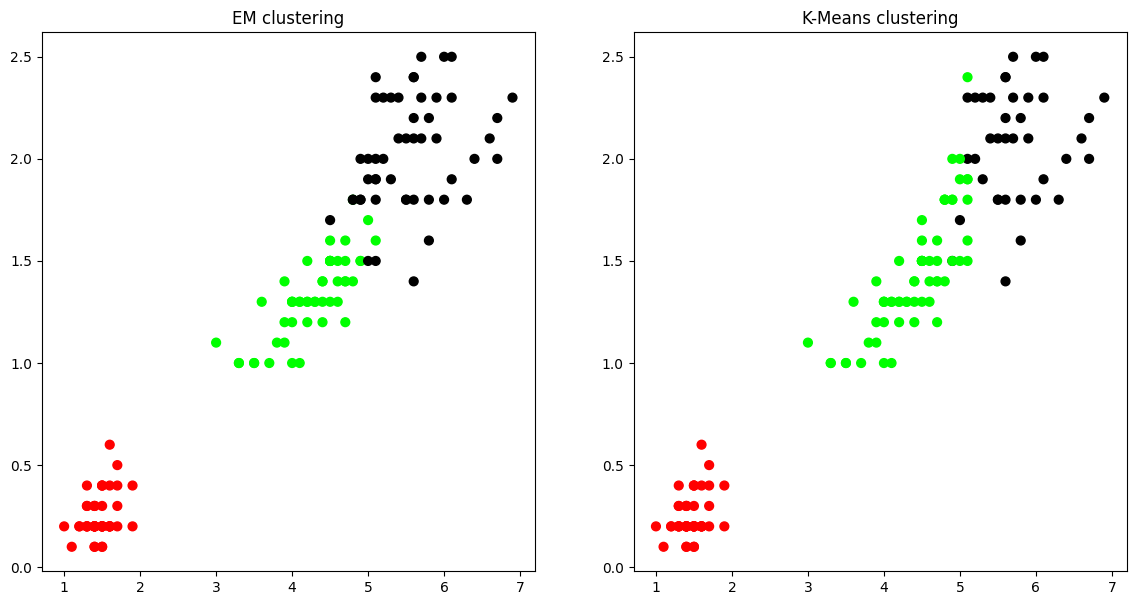

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import sklearn.metrics as sm
iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']
plt.figure(figsize=(14,7))
model=KMeans(n_clusters=3)
model.fit(X)
model.labels_
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('EM clustering')
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X
            .Petal_Width,c=colormap[model.labels_],s=40)
plt.title('K-Means clustering')
acc=sm.accuracy_score(y,model.labels_)
print(acc*100)


### LAB 9 [K-NEAREST NEIGHBOR ALGORITHM]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data
iris_labels=iris.target
print(iris_data)
print(iris_labels)
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_labels,test_size=0.30)
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('confusion matrix is as follows')
print(confusion_matrix(y_test,y_pred))
print('Accuracy metrices')
print(classification_report(y_test,y_pred))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### LAB 10 [LOCALLY WEIGHTED REGRESSION ALGORITHM]